# 데이터 분석에 앞서, 팀 소개와 인사말

In [1]:
from IPython.display import Image

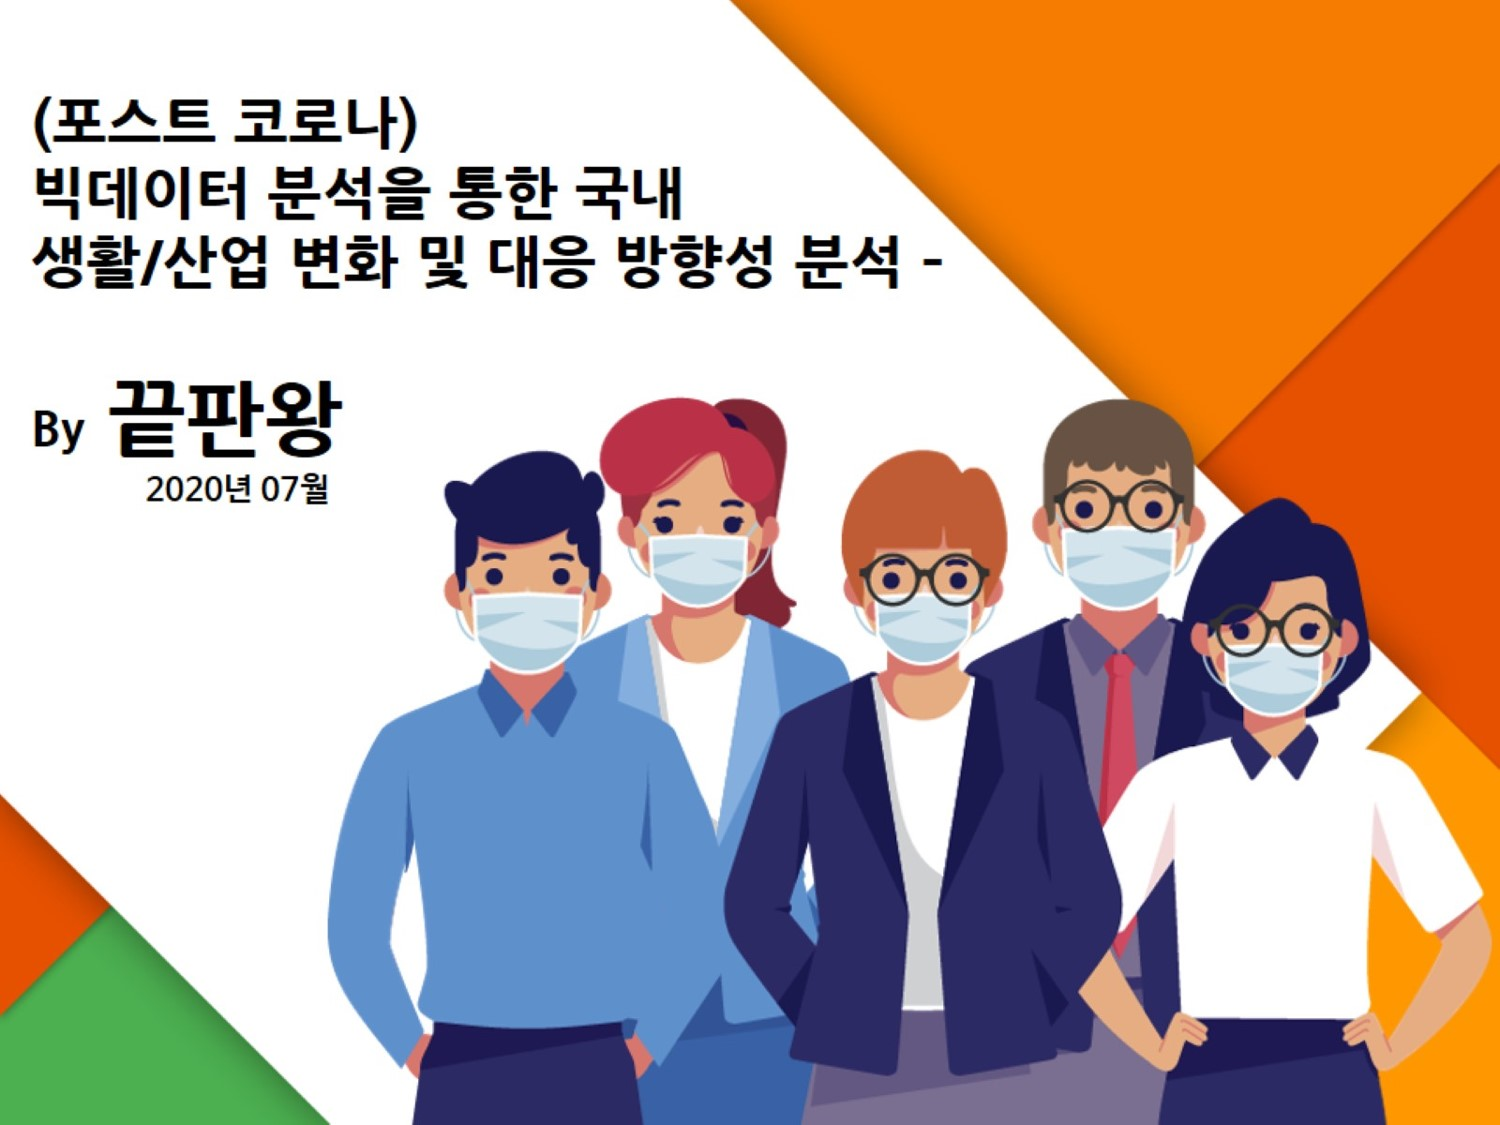

In [2]:
Image("PPT_IMG/00.표지_1.jpg")

#### 안녕하세요, 저희는 빅데이터를 분석하고자하는 열정으로 모인 5명의 학생, 끝판왕입니다.
#### 빅데이터를 위해 노력중인 모든 분들의 편에서 함께 노력하는 끝판왕 팀이 되겠습니다.

# Ⅰ 연구 개요

## 연구의 배경 및 필요성

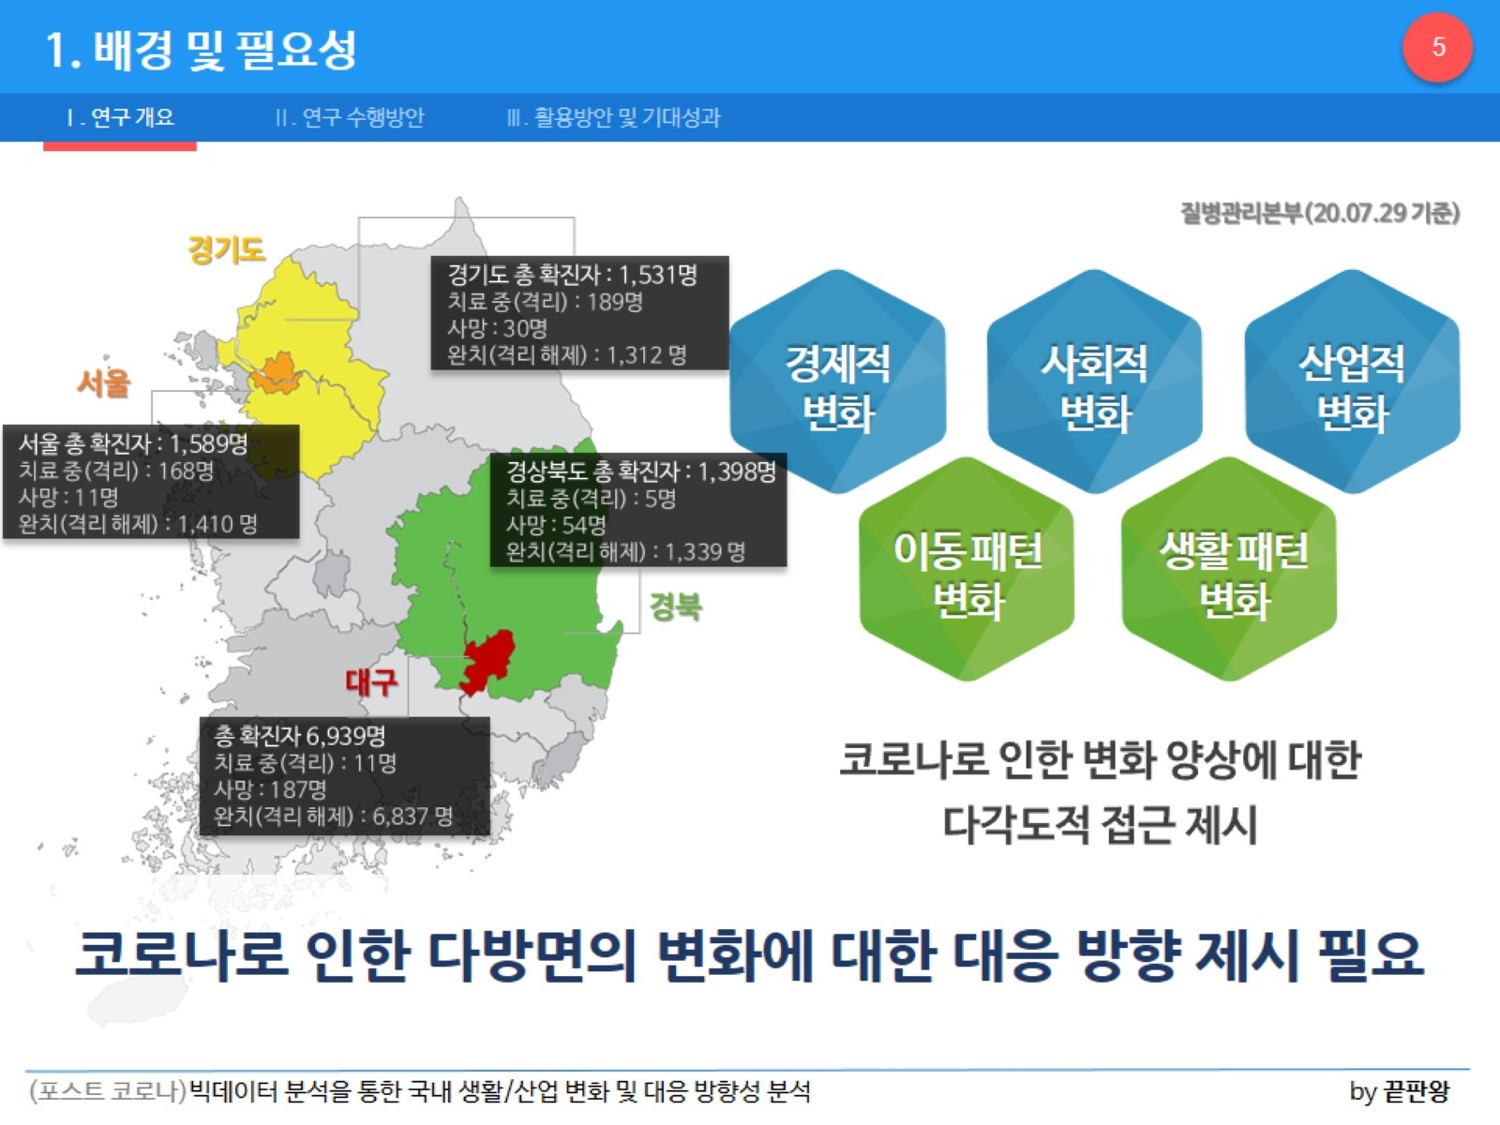

In [3]:
Image("PPT_IMG/04.배경및필요성_2.jpg")

- COVID-19(코로나바이러스 감염증-19, 이후 '코로나'로 통일)는 2019년 12월 중국을 시작으로 전세계로 퍼지며, 현재까지 크게 사회 및 경제적 변화, 생활 패턴의 변화 등을 비롯하여 실생활에 밀접한 영향을 주고있습니다.
- 코로나의 비말을 매개로 한 강력한 전파력은 사회적 거리두기를 필두로 사회 전반에 '언택트(비대면) 신드롬'을 불러일으키며 다양한 산업 분야의 판도를 좌지우지 하고 있습니다.
- 이에 따라 지속적으로 화두가 되고 있는 다양한 정부의 예방 정책들이 등장하였고, 코로나에 대응하기 위한 약 6개월의 시간과 데이터들이 축적되어 왔습니다.
- '포스트 코로나', 즉 코로나의 유행을 겪은 지금 이 시점에서  
`1) 코로나의 영향에 대한 다양한 분야의 데이터를 탐색하여 객관적인` **코로나의 영향력을 분석**하고,  
2) 현재까지 지속되고 있는 `다양한 대응책에 대한` **중간 검토를 통해 향후 더 나은 방향성 제시에 지표**`가 되고자 합니다.

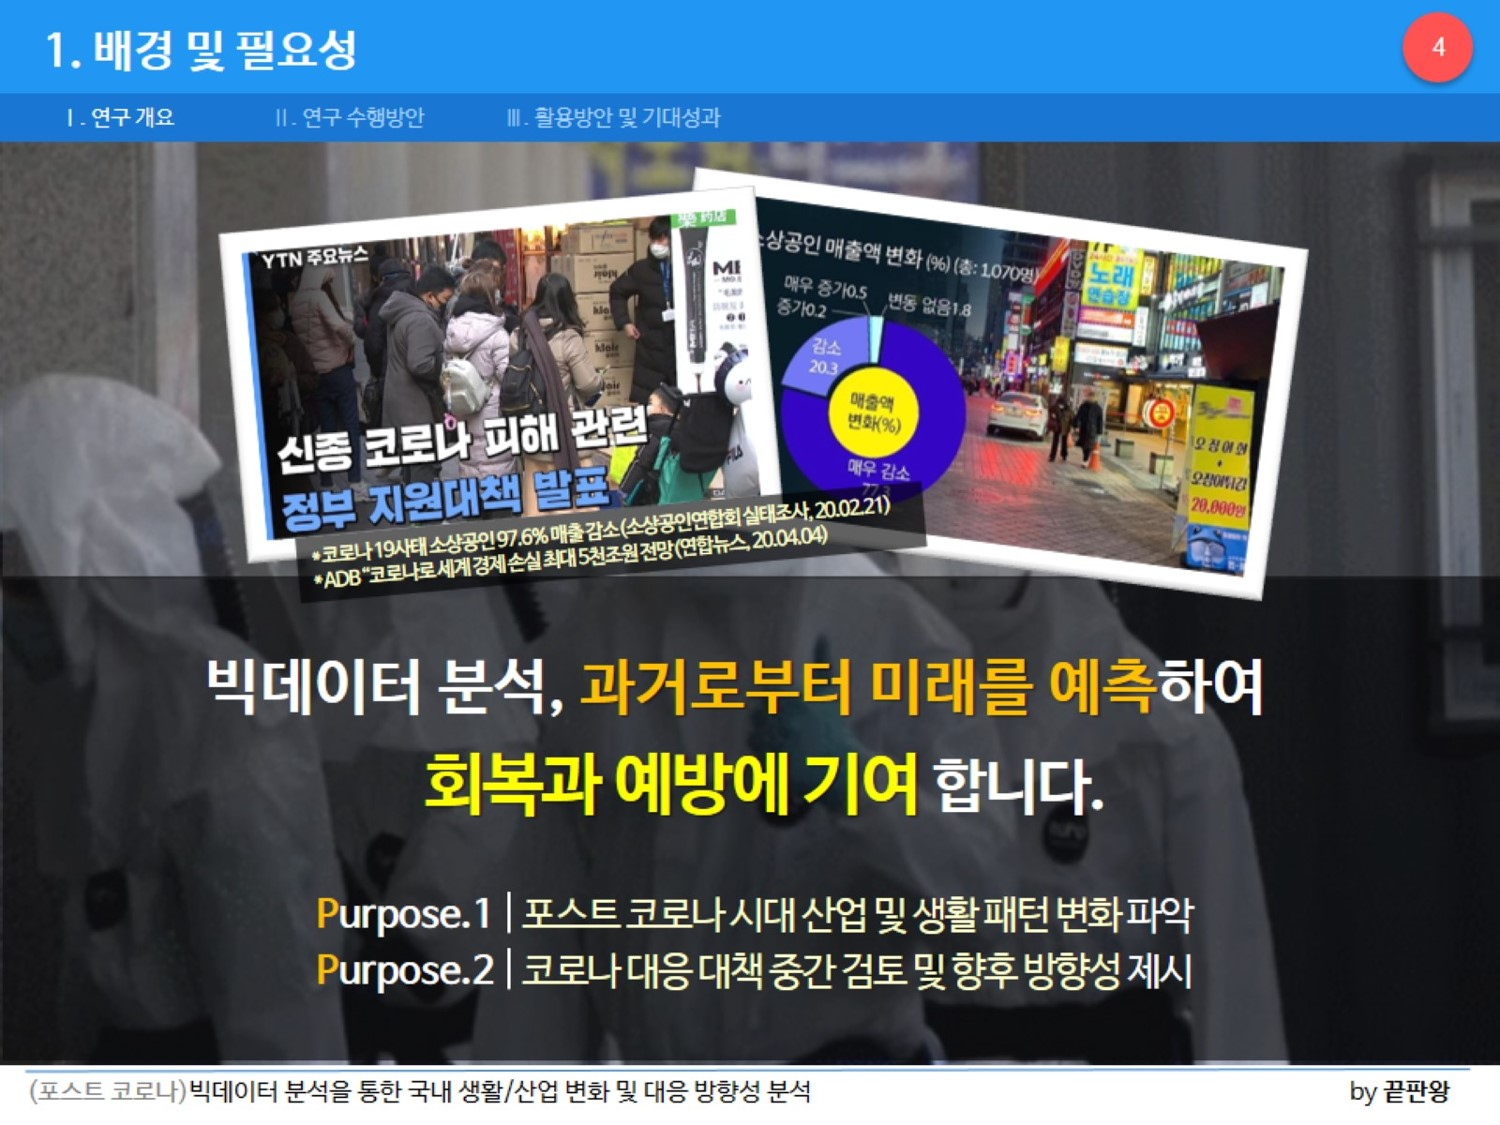

In [4]:
Image("PPT_IMG/03.배경및필요성.jpg")

## ○ 주제 
    ▶ 포스트 코로나 시대를 맞이하여 다양한 분야의 산업 및 생활 패턴의 객관적 변화 추이를 파악하여 실증적 현황 분석
    ▶ 현재까지 진행된 코로나 대응 대책과 양상에 대한 중간 체크를 통해 향후 대응 및 예방 방향성 제시  

## ○ 가치
    ▶ 빅데이터를 기반으로 코로나가 미치는 영향을 보다 객관적이고 심층적으로 이해
    ▶ 데이터 분석을 통해 발굴한 인사이트의 높은 활용 가능성과 파급효과

## 연구개요
    ▶ 활용 데이터 
        : 유동인구(fpopl.csv), 행정동(adstrd_master.csv), 코로나 확진자,  
          날짜 별 지역별 확진자 수(timeprovince.csv), 카드사용 발생건수 및 매출(card.csv) 데이터
          
    ▶ 분석 및 활용 데이터의 범위
        - 시간적 범위 : 20.01.01(수) ~ 20.6.16(화)
        - 공간적 범위 : 서울시 집중 분석 (파일럿 분석을 통해 전국 분석 범위 확산 가능성 제시)
        
    ▶ 분석 방안(사용 함수) : 파이썬을 기반으로 피어슨 상관분석을 중심으로 다양한 통계·수학적 분석 방안 활용

# Ⅱ 연구 수행

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import plotly.express as px
from plotly import graph_objects as go
import folium
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from sklearn.preprocessing import scale
import urllib, json
from datetime import datetime
from sklearn.preprocessing import scale
import math
from plotly.subplots import make_subplots
plt.rcParams['font.family'] = 'Malgun Gothic' ## 그래프에서 한글보이도록 폰트설정

## 데이터 불러오기

In [6]:
# 유동인구 데이터 불러오기

f = pd.read_csv("fpopl.csv")
df = pd.DataFrame(f)

# 행정동 데이터 불러오기

f2 = pd.read_csv("adstrd_master.csv")
df2 = pd.DataFrame(f2)

#코로나 데이터 불러오기
grouped1 = pd.read_csv('COVID_19/TimeProvince.csv')
grouped1 = grouped1[grouped1.province=='Seoul']

#카드 데이터 불러오기
card_raw = pd.read_csv("COVID_19/card_20200717.csv", encoding='utf-8')


In [7]:
card = card_raw.copy()
df.shape, df2.shape, card.shape

((47546443, 6), (3493, 4), (3713952, 7))

### 데이터 전처리

 - 데이터 시각화에 앞서 각 데이터 별로 목적에 따라 전처리 작업을 실행하였습니다.
 - 코로나 데이터는 서울시 주차별 코로나 확진자 변화와 일일확진자를 확인하기 위해 전처리 하였습니다.
 - 유동인구 데이터는 서울시 유동인구 지도 시각화와 주차별 유동인구의 변화를 확인하기 위한 형태로 처리하였습니다.
 - 또한 유동인구와 코로나 확진자 셋을 병합하여 둘 사이의 상관관계를 확인할 수 잇도록 준비하였습니다.
 - 카드데이터와 행정동 데이터는 셋을 병합하여 월별, 구별 매출 발생 건수를 확인하고 비교하도록 데이터를 준비하였습니다.

#### 코로나 데이터 전처리

In [12]:
grouped1['주차'] = grouped1.index +20
grouped1['주차'] = grouped1['주차']/7+1
grouped1 = grouped1.astype({'주차': 'int'})
grouped1

#### 유동인구 전처리

In [13]:
# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people = pd.merge(df,df2,on="adstrd_code",how="left")

In [14]:
del move_people['brtc_nm']

# brtc_nm은 시도 명이다.
# 현 DATASET은 서울시 내 행정구역 데이터이기 때문에, brtc_nm 칼럼 삭제

In [15]:
move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

grouped = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()

grouped4merge = grouped


In [16]:
grouped['주차'] = grouped['년월일']%20200000

grouped['월'] = round(grouped['주차']/100)
grouped['일'] = grouped['주차']%100 + 30* (grouped['월']-1) +2

grouped['주차'] = round(grouped['일']/7+1)
del grouped['월']

grouped = grouped.astype({'주차': 'int'})
del grouped['일']

In [17]:
grouped['유동인구_표준화'] = scale(grouped['유동인구'])

grouped_avg = grouped.mean()
grouped['유동인구_평균대비_증감률'] = (grouped['유동인구']-grouped_avg[1])/grouped_avg[1]*100
grouped['유동인구_코로나전평균'] = round(grouped['유동인구']-grouped.iloc[0:35]['유동인구'].mean())

grouped_folium = grouped


In [18]:
temp1 = grouped.copy()
del temp1['행정구']
temp1 = temp1.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
temp1['일자'] = temp1.index+1
temp1['주차'] = temp1['일자']/7+1
temp1 = temp1.astype({'주차': 'int'})

#### 데이터프레임 합치기

In [19]:
final_df = pd.merge(grouped,temp1,on="주차",how="left")

In [20]:
covidfpopl_df=pd.merge(grouped1, temp1, on ="주차", how="left")

In [21]:
# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people2 = pd.merge(df,df2,on="adstrd_code",how="left")

In [22]:
move_people2 = move_people2.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

In [23]:
grouped2 = move_people2.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
# 행정동별, 행정구별, 시간대별, 날짜별 _유동인구
grouped2

,년월일,유동인구
0,20200101,45208028
1,20200102,55749874
2,20200103,59151121
3,20200104,54474173
4,20200105,46903976
...,...,...
163,20200612,60942009
164,20200613,54872785
165,20200614,46161661
166,20200615,58717583


In [24]:
grouped['유동인구_표준화'] = scale(grouped['유동인구'])

In [25]:
grouped_avg = grouped.mean()
grouped_avg[1]

2113573.319285714

In [26]:
grouped['유동인구_평균대비_증감률'] = (grouped['유동인구']-grouped_avg[1])/grouped_avg[1]*100
seoul = grouped

In [27]:
path = './COVID_19/'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo_20200717.csv')
#p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
policy = pd.read_csv(path+'Policy.csv')

In [28]:
t_provin_Seoul = t_provin.groupby(by=['date','province']).sum()['confirmed'].reset_index()
t_provin_Seoul = t_provin_Seoul.loc[t_provin_Seoul['province']=='Seoul']
t_provin_Seoul = t_provin_Seoul.rename({'confirmed':'총확진자'},axis = 'columns')
t_provin_Seoul = t_provin_Seoul.drop('province',axis=1)
t_provin_Seoul['일일확진자'] = t_provin_Seoul['총확진자']
t_provin_Seoul

,date,총확진자,일일확진자
15,2020-01-20,0,0
32,2020-01-21,0,0
49,2020-01-22,0,0
66,2020-01-23,0,0
83,2020-01-24,0,0
...,...,...,...
2701,2020-06-26,1267,1267
2718,2020-06-27,1284,1284
2735,2020-06-28,1298,1298
2752,2020-06-29,1305,1305


#### 카드데이터 전처리

In [29]:
# 칼럼명 변경
card.columns=['카드사용접수일', '행정동코드', '가맹점행정동명', '가맹점업종코드', '가맹점업종명',
              '매출발생건수', '매출발생금액']

# 숫자 데이터를 string type에서 int64로 변경
card.매출발생건수=card.매출발생건수.astype('int64')
card.매출발생금액=card.매출발생금액.astype('int64')

# 날짜 데이터를 string type에서 date type으로 변경
card.카드사용접수일 = pd.to_datetime(card.카드사용접수일, format="%Y%m%d")

# BC카드 업종 코드 분류에 따른 대분류를 위해 업종코드를 앞에 한자리만 추출
# slicing을 위해 string type으로 변경
card.가맹점업종코드=card.가맹점업종코드.astype(str)
card['가맹점업종코드앞자리']=card.가맹점업종코드.str.slice(start=0,stop=1)

# 행정동코드를 다른 데이터와 같게 자릿수를 맞춰줌
card.행정동코드=card.행정동코드.astype(str)
card.행정동코드=card.행정동코드.str.slice(start=0,stop=8)
card.행정동코드=card.행정동코드.astype('int64')

# 가맹점 업종 코드를 앞에 2자리만 남기게 slicing
card['가맹점업종코드두자리']=card.가맹점업종코드.str.slice(start=0, stop=2)

In [30]:
# 가맹점 업종 대분류
# 가맹점 업종 코드 앞자리에 따라 분류
# card_s={1:'관광',2:'취미',3:'생활',4:'쇼핑',5:'교육',6:'차량',7:'의료',8:'음식',9:'기타'}

In [31]:
# 카드 사용 접수일을 월만 남기도록 slicing
card.카드사용접수일=card.카드사용접수일.astype(str)
card.카드사용접수일=card.카드사용접수일.str.slice(start=5,stop=7)

#### 행정동 데이터와 카드 데이터 병합

In [32]:
adstrd = df2.copy()

In [33]:
adstrd.columns=['행정동코드','동','시','구']

In [34]:
# float 타입인 행정동코드를 int타입으로 변경
adstrd.행정동코드=adstrd.행정동코드.astype('int64')

# 서울시 데이터만 뽑아서 데이터 프레임으로 생성
adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]
adstrd_seoul.columns=['행정동코드','행정동명','시','구']

In [35]:
# 카드 데이터와 행정동 데이터를 행정동코드 기준으로 병합

card_gu=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

#### 코로나와 날씨 데이터 전처리 및 병합

In [36]:
# 유동인구 데이터 불러오기

f = pd.read_csv("fpopl.csv")
df = pd.DataFrame(f)

# 행정동 데이터 불러오기

f2 = pd.read_csv("adstrd_master.csv")
df2 = pd.DataFrame(f2)

# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

In [37]:
move_people = pd.merge(df,df2,on="adstrd_code",how="left")

move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

grouped = move_people.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
# 행정동별, 행정구별, 시간대별, 날짜별 _유동인구
grouped['유동인구_표준화'] = scale(grouped['유동인구'])
grouped_avg = grouped.mean()
grouped['유동인구_평균대비_증감률'] = (grouped['유동인구']-grouped_avg[1])/grouped_avg[1]*100
seoul = grouped

In [38]:
#날씨와 코로나 데이터 불러오기
path = './COVID_19/'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo_20200717.csv')

time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')
floating = pd.read_csv(path+'SeoulFloating.csv')
policy = pd.read_csv(path+'Policy.csv')

In [39]:
t_provin_Seoul = t_provin.groupby(by=['date','province']).sum()['confirmed'].reset_index()
t_provin_Seoul = t_provin_Seoul.loc[t_provin_Seoul['province']=='Seoul']
t_provin_Seoul = t_provin_Seoul.rename({'confirmed':'총확진자'},axis = 'columns')
t_provin_Seoul = t_provin_Seoul.drop('province',axis=1)
t_provin_Seoul['일일확진자'] = t_provin_Seoul['총확진자']

In [40]:
my_list = np.array(t_provin_Seoul['총확진자'])
new_list = np.ones((len(my_list)),dtype = np.int64)

for i in range(len(my_list)):
    if i == 0:
        new_list[i]=my_list[i]
    else:
        new_list[i] = my_list[i]-my_list[i-1]

In [41]:
t_provin_Seoul['일일확진자'] = new_list
t_provin_Seoul = t_provin_Seoul.rename({'date':'년월일'},axis='columns').reset_index()
t_provin_Seoul = t_provin_Seoul.drop('index',axis=1)

In [42]:
t_provin_korea = t_provin.groupby(by=['date']).sum()['confirmed'].reset_index()
t_provin_korea_cum = t_provin_korea.rename({'date':'년월일','confirmed':'전국누적확진자'},axis='columns')

In [43]:
p_info_seoul = p_info.loc[p_info['province']=='서울']

In [44]:
p_info_seoul_oversea = p_info_seoul.loc[p_info_seoul['infection_case']=='overseas inflow']
p_info_seoul_oversea = p_info_seoul_oversea.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_oversea = p_info_seoul_oversea.rename({'confirmed_date':'년월일','province':'해외유입확진자수'},axis = 'columns')

In [45]:
p_info_seoul_not_group = p_info_seoul[p_info_seoul['infection_case'].isin(['etc','contact with patient',np.nan])]
p_info_seoul_not_group = p_info_seoul_not_group.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_not_group = p_info_seoul_not_group.rename({'confirmed_date':'년월일','province':'비그룹감염확진자수'},axis = 'columns')

In [46]:
p_info_seoul_group = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_seoul_group = p_info_seoul_group.groupby(by=['confirmed_date']).count()['province'].reset_index()
p_info_seoul_group = p_info_seoul_group.rename({'confirmed_date':'년월일','province':'그룹감염확진자수'},axis='columns')

In [47]:
p_info_korea = p_info.groupby(by=['confirmed_date']).count()['country'].reset_index()
p_info_korea = p_info_korea.rename({'confirmed_date':'년월일','country':'전국일일확진자'},axis='columns')

In [48]:
p_info_korea_group = p_info[~p_info['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
print(p_info_korea_group['infection_case'].value_counts())
p_info_korea_group = p_info_korea_group.groupby(by=['confirmed_date']).count()['country'].reset_index()
p_info_korea_group = p_info_korea_group.rename({'confirmed_date':'년월일','country':'그룹감염_전국'},axis='columns')

Itaewon Clubs                                    162
Richway                                          128
Guro-gu Call Center                              112
Shincheonji Church                               107
Coupang Logistics Center                          80
Yangcheon Table Tennis Club                       44
Day Care Center                                   43
SMR Newly Planted Churches Group                  36
Onchun Church                                     33
Bonghwa Pureun Nursing Home                       31
gym facility in Cheonan                           30
Ministry of Oceans and Fisheries                  28
Wangsung Church                                   24
Cheongdo Daenam Hospital                          21
Dongan Church                                     17
Eunpyeong St. Mary's Hospital                     16
Gyeongsan Seorin Nursing Home                     15
KB Life Insurance                                 13
Dunsan Electronics Town                       

In [49]:
mylist= list(range(0,19))
groupTotal = seoul.drop(mylist)
groupTotal = groupTotal.reset_index()
groupTotal = groupTotal.drop("index", axis=1)

In [50]:
mylist = list(range(149,163))
t_provin_Seoul = t_provin_Seoul.drop(mylist).reset_index()

In [51]:
groupTotal = pd.concat([groupTotal,t_provin_Seoul.drop(['index','년월일'],axis=1)],axis=1)

In [52]:
groupTotal['년월일']=pd.to_datetime(groupTotal['년월일'],format='%Y%m%d')

In [53]:
p_info_seoul_not_group['년월일'] = pd.to_datetime(p_info_seoul_not_group['년월일'])
p_info_seoul_group['년월일'] = pd.to_datetime(p_info_seoul_group['년월일'])
p_info_seoul_oversea['년월일'] = pd.to_datetime(p_info_seoul_oversea['년월일'])
p_info_korea['년월일'] = pd.to_datetime(p_info_korea['년월일'])
t_provin_korea_cum['년월일'] = pd.to_datetime(t_provin_korea_cum['년월일'])

In [54]:
groupTotal = pd.merge(groupTotal, p_info_seoul_not_group, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_seoul_group, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_seoul_oversea, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, p_info_korea, on='년월일',how="left")
groupTotal = pd.merge(groupTotal, t_provin_korea_cum, on='년월일',how="left")

In [55]:
corr = groupTotal.corr(method='pearson')
print(corr)

                   유동인구  유동인구_표준화  유동인구_평균대비_증감률      총확진자     일일확진자  \
유동인구           1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_표준화       1.000000  1.000000       1.000000  0.247355 -0.011350   
유동인구_평균대비_증감률  1.000000  1.000000       1.000000  0.247355 -0.011350   
총확진자           0.247355  0.247355       0.247355  1.000000  0.375960   
일일확진자         -0.011350 -0.011350      -0.011350  0.375960  1.000000   
비그룹감염확진자수     -0.164101 -0.164101      -0.164101 -0.202362  0.332749   
그룹감염확진자수       0.259520  0.259520       0.259520  0.388663  0.417358   
해외유입확진자수      -0.104668 -0.104668      -0.104668 -0.076991  0.367691   
전국일일확진자       -0.158264 -0.158264      -0.158264 -0.248560  0.325481   
전국누적확진자        0.064788  0.064788       0.064788  0.892616  0.430879   

               비그룹감염확진자수  그룹감염확진자수  해외유입확진자수   전국일일확진자   전국누적확진자  
유동인구           -0.164101  0.259520 -0.104668 -0.158264  0.064788  
유동인구_표준화       -0.164101  0.259520 -0.104668 -0.158264  0.064788  
유동인구_평

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



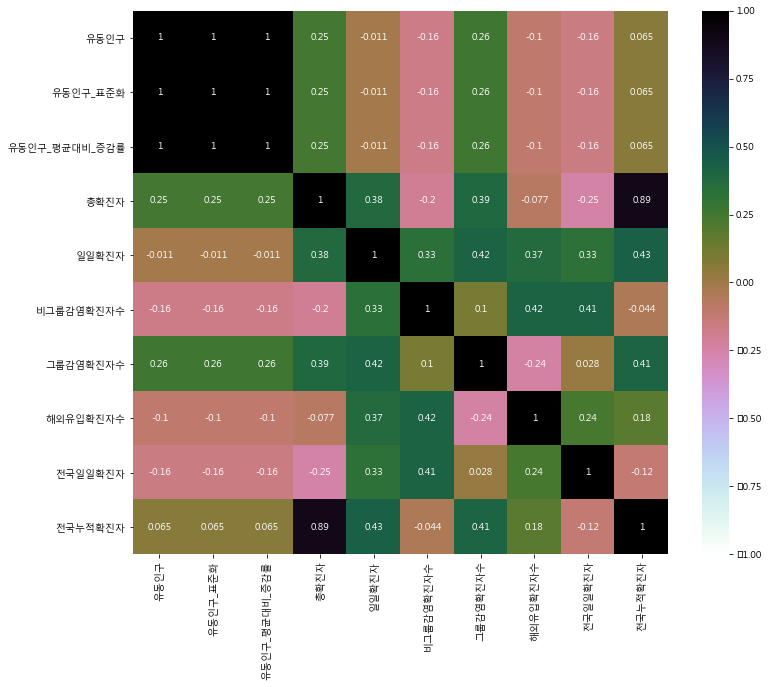

In [56]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( groupTotal.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [57]:
# card = pd.read_csv("card.csv")
# adstrd = pd.read_csv("adstrd_master.csv")

# # row 최대 출력 갯수 지정

# pd.options.display.max_rows=999

# # card 데이터 컬럼명 변경

# card.columns=['카드사용내역접수일자','행정동코드','행정동명','업종코드','업종명','매출발생건수','매출발생금액']

# # 행정동 정보 컬럼명 변경

# adstrd.columns=['행정동코드','동','시','구']

# # 행정동 코드를 int 타입으로 변경

# adstrd.행정동코드=adstrd.행정동코드.astype(int)

# # 행정동,시군구 데이터에서 서울 데이터만 추출

# adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]

# # 서울 데이터 컬럼명 변경

# adstrd_seoul.columns=['행정동코드','행정동명','시','구']

# # card 데이터에서 행정동 코드를 추출하여 string 타입으로 변경
# code=card.행정동코드
# code=code.astype(str)

# # 문자 타입으로 변경한 행정동 코드를 시군구 데이터의 행정동코드와 같은 자릿수로 맞춰줌
# for i in range(len(code)):
#     code[i]=code[i][:8]
    
# # 바꿔준 행정동 코드를 다시 문자에서 정수 타입으로 변환한 뒤 데이터 프레임에 삽입

# code=code.astype(int)
# card.행정동코드=code

# # 행정동 데이터프레임과 카드 데이터 프레임을 행정동 코드를 기준으로 병합

# dong=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

# # 불필요한 컬럼 제거 및 컬럼명 변경

# dong.drop(['행정동명_y'],axis=1, inplace=True)
# dong.rename(columns={'행정동명_x':'행정동명'}, inplace=True)

In [58]:
gubyul = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()

In [59]:
gubyul = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()
gubyul['년월일'] = pd.to_datetime(gubyul['년월일'],format='%Y%m%d')
gubyul = pd.merge(gubyul,t_provin_korea_cum,on=["년월일"],how="left")
gubyul = pd.merge(gubyul,p_info_korea,on=["년월일"],how="left")

In [60]:
p_info_seoul = p_info.loc[p_info['province']=='서울']

In [61]:
p_info_seoul_oversea = p_info_seoul.loc[p_info_seoul['infection_case']=='overseas inflow']
p_info_seoul_oversea = p_info_seoul_oversea.groupby(by=['confirmed_date','city']).count()['province'].reset_index()
p_info_seoul_oversea = p_info_seoul_oversea.rename({'confirmed_date':'년월일','city':'행정구','province':'해외유입확진자수'},axis = 'columns')
p_info_seoul_oversea['년월일'] = pd.to_datetime(p_info_seoul_oversea['년월일'],format='%Y-%m-%d')

In [62]:
p_info_seoul_not_group = p_info_seoul[p_info_seoul['infection_case'].isin(['etc','contact with patient',np.nan])]
p_info_seoul_not_group = p_info_seoul_not_group.groupby(by=['confirmed_date','city']).count()['province'].reset_index()
p_info_seoul_not_group = p_info_seoul_not_group.rename({'confirmed_date':'년월일','city':'행정구','province':'비그룹감염확진자수'},axis = 'columns')
p_info_seoul_not_group['년월일'] = pd.to_datetime(p_info_seoul_not_group['년월일'],format='%Y-%m-%d')

In [63]:
p_info_seoul_group = p_info_seoul[~p_info_seoul['infection_case'].isin(['etc','contact with patient','overseas inflow',np.nan])]
p_info_seoul_group = p_info_seoul_group.groupby(by=['confirmed_date','city']).count()['province'].reset_index()
p_info_seoul_group = p_info_seoul_group.rename({'confirmed_date':'년월일','city':'행정구','province':'그룹감염확진자수'},axis='columns')
p_info_seoul_group['년월일'] = pd.to_datetime(p_info_seoul_group['년월일'],format='%Y-%m-%d')

In [64]:
gubyul2 = pd.merge(gubyul,p_info_seoul_oversea,on=['년월일','행정구'],how="left")
gubyul2 = pd.merge(gubyul2, p_info_seoul_not_group,on=['년월일','행정구'],how="left")
gubyul2 = pd.merge(gubyul2, p_info_seoul_group, on=['년월일','행정구'],how="left")

gubyul2 = gubyul2.fillna(0)

In [65]:
gubyul2_backup = gubyul2
# gubyul2 backupfile


In [66]:
card_raw = pd.read_csv("./card.csv")

In [67]:
card = card_raw
card.shape

(3777647, 7)

In [68]:
# 컬럼 최대 출력 갯수 지정

pd.options.display.max_rows=999

In [69]:
# 데이터 오류 제거
errvals = ["석재", "커텐", "영상물", "복지매장", "축협직영매장"]

for errval in errvals:
    card = card.drop( card[card["selng_cascnt"] == errval].index )

# 구매건수, 구매총액 string type to int64
card["selng_cascnt"] = card["selng_cascnt"].astype("int64") 
card["salamt"] = card["salamt"].astype("int64") 

# 날짜 데이터 int type to datetime
card["receipt_dttm"] = pd.to_datetime(card["receipt_dttm"], format="%Y%m%d")

# '가맹점업종코드 앞 한 자리' 칼럼 추가(업종별로 묶기 위함)
card['mrhst_induty_cl_code'] = card['mrhst_induty_cl_code'].astype(str)
card['mrhst_induty_clm_code'] = card['mrhst_induty_cl_code'].str.slice(start=0, stop=1)

# 가맹점업종코드 앞 한 자리' 칼럼 순서 변경
card = card[['receipt_dttm',  'adstrd_code', 'adstrd_nm','mrhst_induty_clm_code', 'mrhst_induty_cl_code',
       'mrhst_induty_cl_nm', 'selng_cascnt', 'salamt']]

# 띄어쓰기 제거
card.mrhst_induty_cl_nm = card.mrhst_induty_cl_nm.str.replace(' ', '')

# 칼럼명 변경
card.columns=['카드사용접수일', '행정동코드', '가맹점행정동명', '가맹점업종코드앞자리', '가맹점업종코드', '가맹점업종명',
              '매출발생건수', '매출발생금액']

In [70]:
# 행정동코드를 다른 데이터와 같게 자릿수를 맞춰줌
card['행정동코드']=card.행정동코드.astype(str)
card['행정동코드']=card.행정동코드.str.slice(start=0,stop=8)
card['행정동코드']=card.행정동코드.astype('int64')

In [71]:
# 가맹점 업종 대분류
# 가맹점 업종 코드 앞자리에 따라 분류
card_s={1:'관광',2:'취미',3:'생활',4:'쇼핑',5:'교육',6:'차량',7:'의료',8:'음식',9:'기타'}

In [72]:
adstrd = pd.read_csv("./adstrd_master.csv")

In [73]:
adstrd.columns=['행정동코드','동','시','구']

In [74]:
# float 타입인 행정동코드를 int타입으로 변경
adstrd.행정동코드=adstrd.행정동코드.astype('int64')

# 서울시 데이터만 뽑아서 데이터 프레임으로 생성
adstrd_seoul=adstrd.loc[adstrd.시=="서울특별시"]
adstrd_seoul.columns=['행정동코드','행정동명','시','구']

In [75]:
# 카드 데이터와 행정동 데이터를 행정동코드 기준으로 병합

card_gu=pd.merge(adstrd_seoul, card, on='행정동코드', how='outer')

In [76]:
# 가맹점 업종 코드를 앞에 2자리만 남기게 slicing
card_gu['가맹점업종코드두자리']=card_gu['가맹점업종코드'].str.slice(start=0, stop=2)

In [77]:
card_gu.가맹점업종코드두자리.unique()

array(['92', '83', '80', '70', '42', '40', '22', '71', '51', '44', '90',
       '50', '32', '20', '52', '91', '61', '99', '21', '93', '34', '10',
       '60', '30', '96', '11', '43', '84', '81', '82', '62', '33', '41',
       '31', '95'], dtype=object)

In [78]:
for i in card_gu.가맹점업종코드두자리.unique():
    globals()['card_shopping_{}'.format(i)] =  pd.DataFrame(card_gu.loc[card_gu['가맹점업종코드두자리']==i])
    globals()['card_shopping_{}'.format(i)] = globals()['card_shopping_{}'.format(i)].reset_index().rename({'카드사용접수일':'년월일','구':'행정구'},axis='columns')
    globals()['card_shopping_{}'.format(i)] =  globals()['card_shopping_{}'.format(i)].groupby(by = ['년월일','행정구']).sum()['매출발생건수'].reset_index()
    globals()['card_shopping_{}'.format(i)] =  globals()['card_shopping_{}'.format(i)].rename({'매출발생건수':i},axis='columns')

In [79]:
# card_shopping_92 =  card_gu.loc[card_gu['가맹점업종코드두자리']=='92']
# card_shopping_92 = card_shopping_92.reset_index().rename({'카드사용접수일':'년월일','구':'행정구'},axis='columns')
# card_shopping_92 =  card_shopping_92.groupby(by = ['년월일','행정구']).sum()['매출발생건수'].reset_index()
# card_shopping_92 = card_shopping_92.reset_index().rename({'매출발생건수':i},axis='columns')

In [80]:
for i in card_gu.가맹점업종코드두자리.unique():
    gubyul2 = pd.merge(gubyul2, globals()['card_shopping_{}'.format(i)],on=['년월일','행정구'],how='left' )

In [81]:
gubyul3 = gubyul2.loc[gubyul2['년월일']>pd.to_datetime('20200105',format='%Y-%m-%d'),:]
gubyul3 = gubyul3.loc[gubyul3['년월일']<pd.to_datetime('20200415',format='%Y-%m-%d'),:]

In [82]:
corr = gubyul3.corr(method='pearson')
print(corr)

               유동인구   전국누적확진자   전국일일확진자  해외유입확진자수  비그룹감염확진자수  그룹감염확진자수  \
유동인구       1.000000 -0.090077 -0.101127  0.171570   0.025172 -0.029501   
전국누적확진자   -0.090077  1.000000  0.409726  0.266825   0.160526  0.080737   
전국일일확진자   -0.101127  0.409726  1.000000  0.097051   0.164919  0.149397   
해외유입확진자수   0.171570  0.266825  0.097051  1.000000   0.135126 -0.022868   
비그룹감염확진자수  0.025172  0.160526  0.164919  0.135126   1.000000  0.028730   
그룹감염확진자수  -0.029501  0.080737  0.149397 -0.022868   0.028730  1.000000   
92         0.544118  0.181363  0.138420  0.249622   0.099471  0.011543   
83         0.492893  0.044320  0.016400  0.103481   0.023966 -0.013859   
80         0.686134 -0.068823 -0.072267  0.132967   0.026392 -0.035422   
70         0.592533  0.093444  0.073179  0.216390   0.083811  0.002991   
42         0.393248 -0.049577 -0.128974  0.062008  -0.003892 -0.037002   
40         0.363196  0.023463  0.036054  0.101463  -0.001985  0.037720   
22         0.203885 -0.079997 -0.05065

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



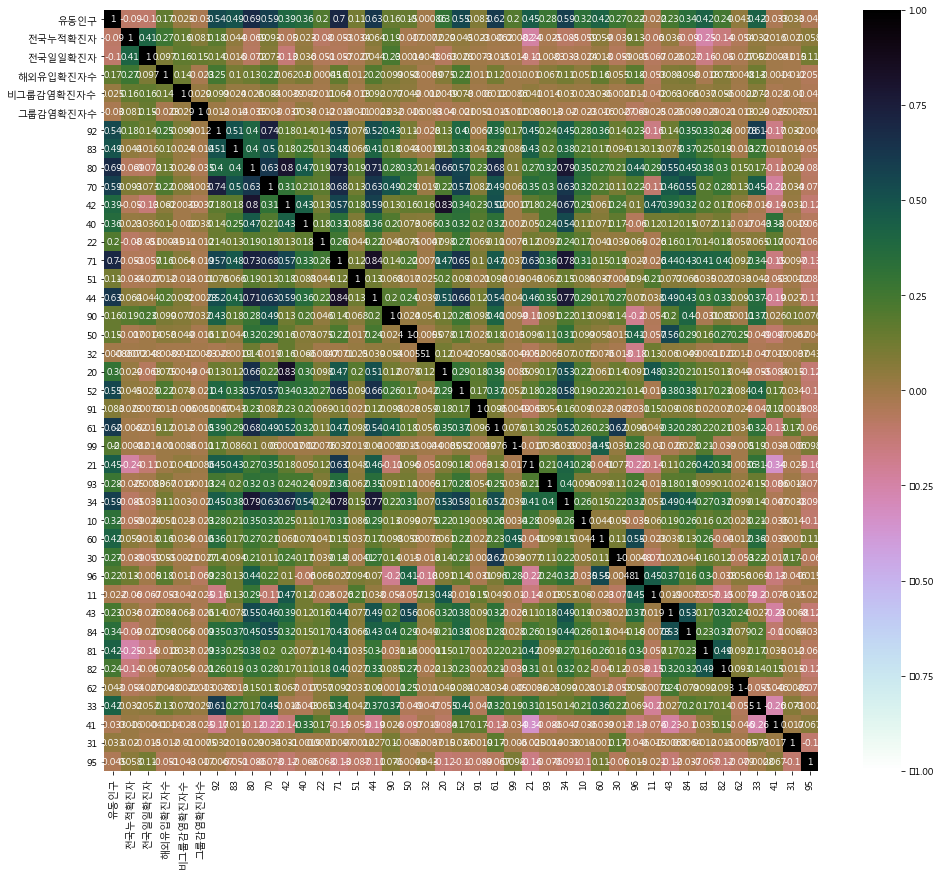

In [83]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(16,14))
sns.heatmap( gubyul3.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [84]:
gubyul4 = gubyul2.loc[gubyul2['년월일']>pd.to_datetime('20200414',format='%Y-%m-%d'),:]

In [85]:
corr = gubyul4.corr(method='pearson')
print(corr)

               유동인구   전국누적확진자   전국일일확진자  해외유입확진자수  비그룹감염확진자수  그룹감염확진자수  \
유동인구       1.000000  0.076536  0.098541  0.056081   0.005522  0.008599   
전국누적확진자    0.076536  1.000000  0.716847  0.006932   0.196263  0.221510   
전국일일확진자    0.098541  0.716847  1.000000  0.028690   0.176370  0.295354   
해외유입확진자수   0.056081  0.006932  0.028690  1.000000  -0.028185  0.003198   
비그룹감염확진자수  0.005522  0.196263  0.176370 -0.028185   1.000000  0.086563   
그룹감염확진자수   0.008599  0.221510  0.295354  0.003198   0.086563  1.000000   
92         0.594870  0.044676  0.036796 -0.002851  -0.012764  0.025189   
83         0.394219  0.069076  0.060743  0.002894  -0.026437 -0.033867   
80         0.672764  0.062338  0.069487  0.014162  -0.021495 -0.034387   
70         0.618553  0.023675  0.093617  0.016049  -0.011040 -0.002260   
42         0.358412  0.133321  0.075932 -0.009346  -0.010196 -0.034920   
40         0.377522  0.016366  0.032166  0.052173   0.004288  0.002501   
22         0.557721 -0.060344 -0.01139

['Malgun Gothic']


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



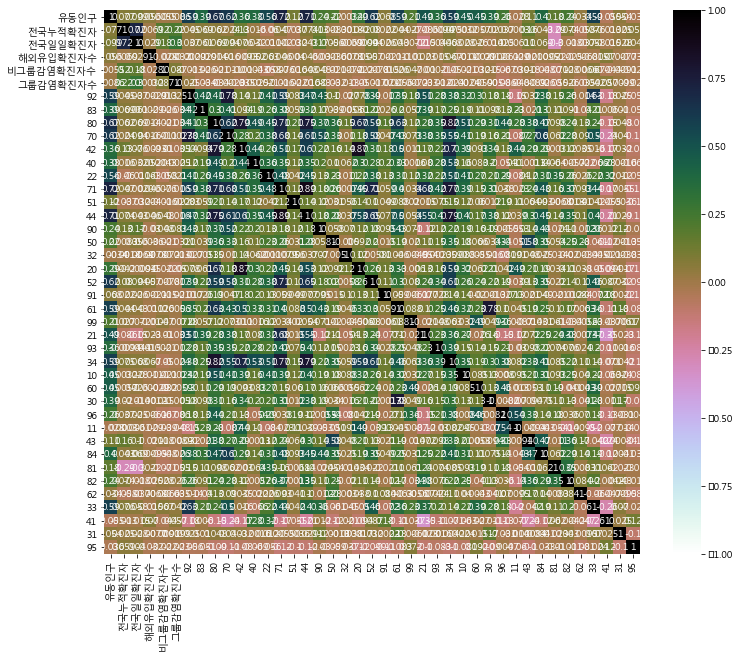

In [86]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( gubyul4.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

In [87]:
gubyul5 = gubyul3.drop([ '전국누적확진자','전국일일확진자','해외유입확진자수',
                        '비그룹감염확진자수','그룹감염확진자수',
                        '92', '80', '70', '42', '40', '71', '51', '44', '90',
       '50', '32', '20', '52', '91', '61', '99', '21', '93', '34',
       '60', '96', '11', '43', '84', '82', '62',  '41',
       '31', '95'], axis=1)

In [88]:
gubyul6 = gubyul4.drop([ '전국누적확진자','전국일일확진자','해외유입확진자수',
                        '비그룹감염확진자수','그룹감염확진자수',
                        '92', '80', '70', '42', '40', '71', '51', '44', '90',
       '50', '32', '20', '52', '91', '61', '99', '21', '93', '34',
       '60', '96', '11', '43', '84', '82', '62',  '41',
       '31', '95'], axis=1)

#### 일일확진자 - 유동인구 전처리 및 데이터 병합

In [89]:
G1 = pd.read_csv('./COVID_19/TimeProvince_hw.csv')
G1 = G1[G1.province=='서울']
G1 = G1.rename({'confirmed':'확진자수','week':'주차'}, axis ='columns')


In [90]:
my_list = np.array(G1['확진자수'])

new_list = np.ones((len(my_list)),dtype = np.int64)

for i in range(len(my_list)):
    if i == 0:
        new_list[i]=my_list[i]
    else:
        new_list[i] = my_list[i]-my_list[i-1]
new_list

G1['일일확진자'] = new_list


In [91]:
G1 =G1.reset_index()

del G1['time']
del G1['province']
del G1['released']
del G1['deceased']

G1['주차'] = G1.index +20
G1['주차'] = G1['주차']/7+1
G1 = G1.astype({'주차': 'int'})

del G1['확진자수']
del G1['date']
del G1['index']

temp1 = G1.groupby(by = ['주차']).sum()['일일확진자'].reset_index()

In [92]:
# 유동인구 데이터 불러오기

f = pd.read_csv("fpopl.csv")
df = pd.DataFrame(f)


# 행정동 데이터 불러오기

f2 = pd.read_csv("adstrd_master.csv")
df2 = pd.DataFrame(f2)

# df와 df2 합치기 (유동인구['adstrd_code'] = 행정동['adstrd_code'])
#                          * adstrd_code = 행정동코드
# 유동인구 데이터와 행정동 이름 합침
# SQL의 LEFT JOIN

move_people = pd.merge(df,df2,on="adstrd_code",how="left")

del move_people['brtc_nm']

# brtc_nm은 시도 명이다.
# 현 DATASET은 서울시 내 행정구역 데이터이기 때문에, brtc_nm 칼럼 삭제

move_people = move_people.rename({'base_ymd':'년월일','tmzon_se_code':'시간대','sexdstn_se_code':'성별','agrde_se_code':'나이대','adstrd_code':'행정동코드','popltn_cascnt':'유동인구','adstrd_nm':'행정동','signgu_nm':'행정구'}, axis ='columns')

grouped = move_people.groupby(by = ['년월일','행정구']).sum()['유동인구'].reset_index()



In [93]:
temp = grouped
del temp['행정구']
temp = temp.groupby(by = ['년월일']).sum()['유동인구'].reset_index()
temp['일자'] = temp.index+1
temp['주차'] = temp['일자']/7+1
temp = temp.astype({'주차': 'int'})
del temp['년월일']
del temp['일자']

In [94]:
final = pd.merge(temp1,temp,on="주차",how="left")
final = final.fillna(0)

final1 = final.groupby(by = ['주차']).mean()['일일확진자'].reset_index()
final2 =final.groupby(by = ['주차']).sum()['유동인구'].reset_index()

final = pd.merge(final1,final2,on="주차",how="left")
final = final[(final.주차 >= 3) & (final.주차 <25)].reset_index(drop=True)

final_boom = final[(final.주차 >= 3) & (final.주차 <16)].reset_index(drop=True) ## 코로나 민감시기
final_row = final[(final.주차 >= 16) & (final.주차 <26)].reset_index(drop=True) ## 일상 회복시기

## 탐색적 데이터 분석 및 시각화

### 상관계수

['Malgun Gothic']


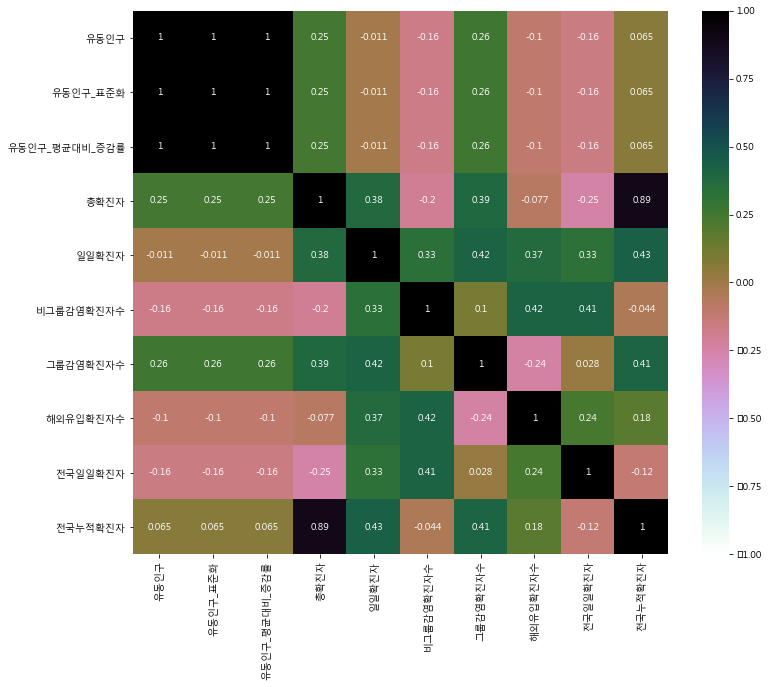

In [95]:
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( groupTotal.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

<시각화 결과 해석>
- 유동인구와 코로나 확진자 간 상관분석 진행하였으나 상관성이 뚜렷하지 않음

<문제 분석>
- 유동인구와 코로나 확진자 관계를 시각화하여 새로운 인사이트 탐색

###  감염자 누적 및 지역별 유동인구 변화

#### 유동인구 변화 시각화

##### 지역별 유동인구 변화 (서울지도)

In [96]:
url = 'https://raw.github.com/PinkWink/DataScience/master/data/02.%20skorea_municipalities_geo_simple.json'
with urllib.request.urlopen(url) as fp:
  json_seoul = json.loads(fp.read())

#서울 자치구 경계 json파일 다운로드

In [97]:
#for idx, seoul_dict in enumerate(json_seoul['features']):
#  gu_name = seoul_dict['id']
#  value = temp.loc[temp.행정구==gu_name, '유동인구'].iloc[0]
#  txt = f'{gu_name}<br>{value}'
#  json_seoul['features'][idx]['properties']['tooltip1'] = txt

In [98]:
#m = folium.Map(location=[37.55, 127], zoom_start=11, tiles='Stamen Terrain')

In [99]:
def print_map(args):
#    print(args)

    clear_output(wait = True)
    display(button1)
    display(button2)
    m = folium.Map(location=[37.55, 127], zoom_start=11, tiles='Stamen Terrain')
    
    temp = grouped_folium[grouped_folium.주차==args]
    for idx, seoul_dict in enumerate(json_seoul['features']):
        gu_name = seoul_dict['id']
        value = temp.loc[temp.행정구==gu_name, '유동인구_코로나전평균'].iloc[0]
        corr = False;
        txt = f'{gu_name}<br>{value:.2f}'
        json_seoul['features'][idx]['properties']['tooltip1'] = txt
        
    choropleth = folium.Choropleth(
        geo_data=json_seoul, 
        data=temp,
        columns=['행정구','유동인구_코로나전평균'],
        fill_color = 'PuBuGn',
        key_on = 'feature.id',
        fill_opacity=0.9,
        line_opacity=1,
        legend_name='Foot Traffic'
    ).add_to(m)

    choropleth.geojson.add_child( folium.features.GeoJsonTooltip(['tooltip1'], labels=False))

    folium.LayerControl().add_to(m)

    title_html = '<h3 align="center" style="font-size:20px"><b>Foot Traffic in Seoul on '+str(args)+' week</b></h3>'
    m.get_root().html.add_child(folium.Element(title_html))

    display(m)
    
date = 1

button1 = widgets.Button(description='다음 주 보기')
button2 = widgets.Button(description='이전 주 보기')
def clicked_next(arg):
    global date
    if date <25:
        date = date + 1
        print_map(date)


def clicked_prev(arg):
    global date
    if date > 1: 
        date = date - 1
        print_map(date)
    

button1.on_click(clicked_next)
button2.on_click(clicked_prev)
display(button2)
display(button1)
print_map(date)

Button(description='다음 주 보기', style=ButtonStyle())

Button(description='이전 주 보기', style=ButtonStyle())

각 주차별 유동인구의 변화를 한눈에 파악하기 위해 지도를 시각화(웹사이트에서는 정상작동되지 않음, 쥬피터 정상작동)
- 서울 자치구의 경계 json 파일을 활용하여 유동인구데이터를 시각화하였습니다.
- 확인한 결과 유동인구가 가장 높은 지역은 서초, 강남, 송파구였으며, 강북 도봉 은평구가 가장 적은 모습을 보였습니다.
- 1주차와 25주차의 유동인구를 비교해보면 코로나 사태 이후로 서울 전체의 평균적인 유동인구가 모든 구에 걸쳐 고르게 줄었음을 확인할 수 있습니다.
- 유동인구는 변화가 크지 않는 데이터라는 것을 발견




##### 서울 전체 유동인구 변화 시각화

In [100]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final['주차'],y=final['유동인구'], name="유동인구"),
    secondary_y=False,
)



# Add figure title
fig.update_layout(
    title_text="<b>각 주차별 유동인구 그래프</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>주차</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>유동인구</b> ", secondary_y=False)


fig.show()

 - 누적확진자 및 일일확진자의 주차별 증가 추이에서 11주차와 14주차에 확진자가 큰 폭으로 증가된 것을 확인할 수 있습니다.
 - 이러한 갑작스러운 증가는 11주차에 신천지 감염자 및 14주차 이태원 클럽발 대규모 집단이 감염자 증가에 큰 영향을 미쳤기 때문입니다.
 - 특이한 점은 이와 같은 폭발적 증가가 발생한 직후 다음 주 일일확진자가 크게 줄었다가 시간이 지나면서 회복하는 모습을 보인다는 점입니다.
 - 이러한 원인으로 두 가지를 유추해볼 수 있습니다. 첫 번 째는 대규모 확진 사건 발생으로 인해 시민들의 경각심이 일시적으로 상승할 수 있다는 것고 두 번 쨰는 감염자들이 사회적 분위기로 인하여 검사를 받지 않고 숨기다가 확진 판정을 늦게 받는 것입니다.
 - 유동인구의 하락세가 컸던 시기는 3주차에서 4주차로 갈 때와 8주차에서 9주차로 접어드는 시점이었습니다. 이후 유동인구는 다시 꾸준히 회복되는 추세를 보임을 확인할 수 있습니다.
 - 마지막으로  유동인구와 일일확진자의 관계를 함께 살펴보면 11주차까지는 두 추세가 서로 반대로 움직이는 경향성을 보이지만 이후부터 그러한 경향성이 사라지는 것이 확인됩니다.

#### 확진자 변화 시각화

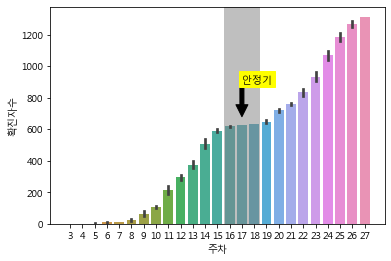

In [101]:
l1 = sns.barplot(x="주차", y="확진자수",data=grouped1)
plt.annotate('안정기', xy=(14, 680), xytext=(14, 900), fontsize=10,
             bbox=dict(boxstyle='square', color='yellow'), 
             arrowprops=dict(facecolor='black')
            )
plt.axvspan(12.5, 15.5, facecolor='gray', alpha=0.5)

# plt.title("서울시 주차별 코로나 확진자 변화")

 기간별 누적확진자수 변화 시각화
- 4월 중순(16~18주)을 기준으로 확진자 증가율 뚜렷이 감소

Text(15, 17, '이태원 사건')

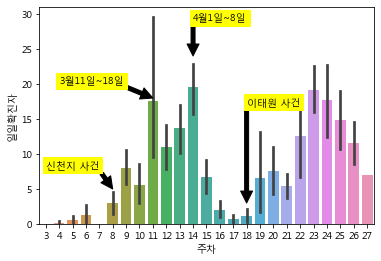

In [102]:
l2 = sns.barplot(x="주차", y="일일확진자",data=grouped1)
plt.annotate('신천지 사건', xy=(5, 5), xytext=(0, 8), fontsize=10,
             bbox=dict(boxstyle='square', color='yellow'), 
             arrowprops=dict(facecolor='black')
            )
plt.annotate('3월11일~18일', xy=(8, 18), xytext=(1, 20), fontsize=10,
             bbox=dict(boxstyle='square', color='yellow'), 
             arrowprops=dict(facecolor='black')
            )
plt.annotate('4월1일~8일', xy=(11, 24), xytext=(11, 29), fontsize=10,
             bbox=dict(boxstyle='square', color='yellow'), 
             arrowprops=dict(facecolor='black')
            )
plt.annotate('이태원 사건', xy=(15, 3), xytext=(15, 17), fontsize=10,
             bbox=dict(boxstyle='square', color='yellow'), 
             arrowprops=dict(facecolor='black')
            )

 기간별 확진자수 증가량 시각화
- 각 사건 발생날짜 1~2주후 확진자수 크게 증가
- 안정기(15주) 아후로 다시 확진자수 크게 증가

In [103]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final['주차'],y=final['유동인구'], name="유동인구"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final['주차'],y=final['일일확진자'], name="일일확진자"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>유동인구와 일일확진자 비교</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>주차</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>유동인구</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>일일확진자</b>", secondary_y=True)

fig.show()

기간별 확진자 수와 유동인구 시각화
- 0~9주차까지 일일확진자가 늘어날수록 유동인구가 감소하는 음의 관계 형성
- 8주차(신천지사건) 이후로 유동인구가 큰 폭으로 떨어짐
- 9주차 이후로 유동인구는 꾸준히 증가하는 양의 관계 형성
- 15주차(이태원사건) 이후 증가량이 살짝 주춤하지만 다시 증가하기 시작
- 코로나 1차 확산시기에 확진자수와 유동인구 간 영향이 존재하다가 4월 중순(15주)이후로 점점 영향이 약해지는 것을 발견


In [104]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final['주차'],y=final['유동인구'], name="유동인구", fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line_color='rgba(255,255,255,0)'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final['주차'],y=final['일일확진자'], name="일일확진자", fill='toself',
    fillcolor='rgba(0,176,246,0.2)',
    line_color='rgba(255,255,255,0)'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>유동인구와 일일확진자 비교</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>주차</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>유동인구</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>일일확진자</b>", secondary_y=True)

fig.show()

In [105]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=final['주차'],y=final['유동인구'], name="유동인구", line_shape='vh'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=final['주차'],y=final['일일확진자'], name="일일확진자",line_shape='vh'),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>유동인구와 일일확진자 비교</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="<b>주차</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>유동인구</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>일일확진자</b>", secondary_y=True)

fig.show()

새로운 가설 설정
- 코로나 확진자와 유동인구 간에 1차 확산기에 영향이 뚜렷했으나 점점 상관관계가 흐릿해짐
- 기준일 4.14일을 기준으로 전반을 '코로나 민감시기', 후반을 '일상 회복 시기' 라고 명명
- '코로나 민감시기'와 '일상 회복 시기'로 데이터를 나누어 분석

### 민감시기와 일상 회복시기 상관계수 분석

In [106]:
corr = final_boom.corr(method='pearson')
corr = final_row.corr(method='pearson')

['Malgun Gothic']


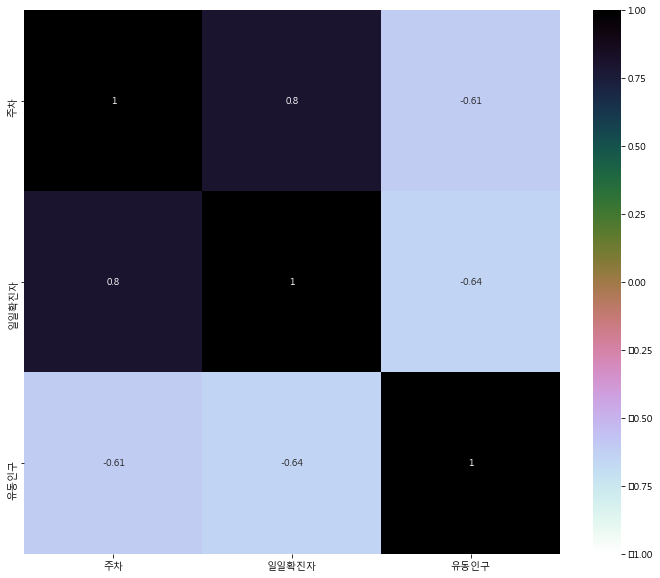

In [107]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( final_boom.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

'코로나 민감시기' 확진자 수와 유동인구 시각화
- 유동인구와 확진자 간 음의 상관관계 뚜렷함.

['Malgun Gothic']


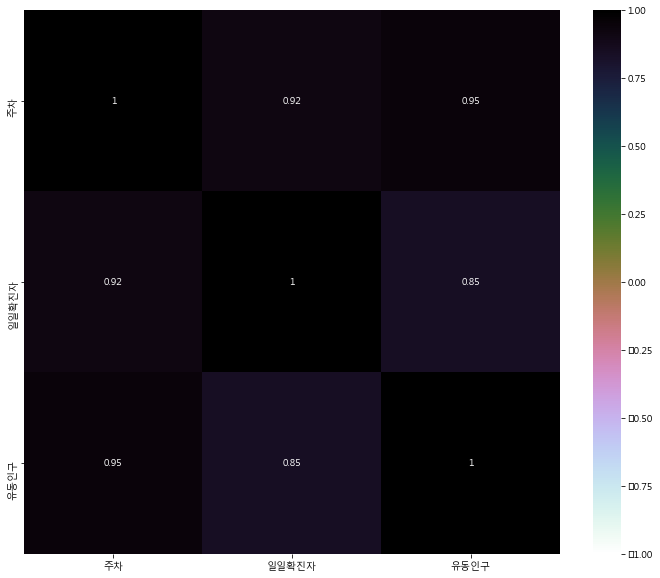

In [108]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(12,10))
sns.heatmap( final_row.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

'일상 회복 시기' 확진자 수와 유동인구 시각화
- 유동인구와 확진자 간 상관관계가 흐려짐

결과 도출
- 코로나 민감시기 유동인구와 확진자 간 상관관계 뚜렷함
- 일상 회복시기 유동인구와 확진자 간 상관관계가 흐려짐


### 유동인구와 산업 별 매출 건수 상관 분석 (전처리 및 병합 포함)

- '코로나 민감시기'와 '일상 회복 시기' 별로 산업에 영향이 존재하는지 분석

['Malgun Gothic']


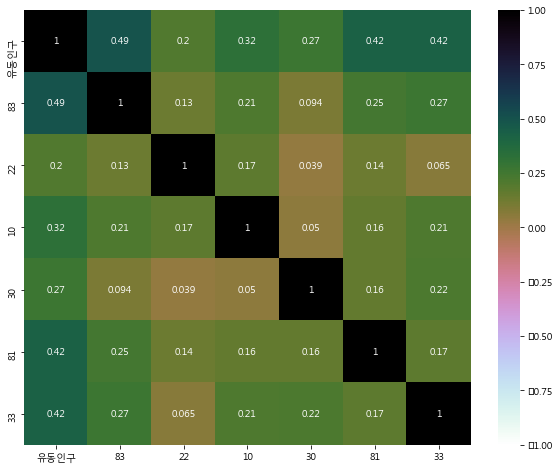

In [109]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(10,8))
sns.heatmap( gubyul5.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

- '코로나 민감시기'의 유동인구와 산업군별 상관분석 히트맵(시각화)↑
- '일상 회복 시기'의 유동인구와 산업군별 상관분석 히트맵(시각화)↓

['Malgun Gothic']


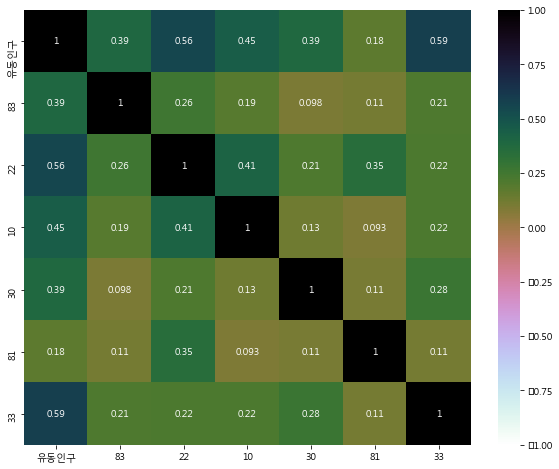

In [110]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

plt.figure(figsize=(10,8))
sns.heatmap( gubyul6.corr(method='pearson'),vmin=-1,vmax=1,annot=True,cmap="cubehelix_r")
plt.show()

- '코로나 민감시기'의 상관계수 - '일상 회복 시기'의 상관계수  간의 차이가 클 수록 코로나의 영향이 존재하는 산업으로 간주
  - 상관계수의 차이가 0.2 이상: 민감한 변화 산업
  - 상관계수의 차이가 0.1 이상 0.2 미만: 약한 변화 산업

정리
- 앞서 진행한 유동인구와 코로나 확진자 수의 상관성에서 기준일(4.14) 이전에는 뚜렷한 음의 상관성,  기준일(4.14) 이후는 상관성 미미함을 확인하였습니다.  (기준일(4.14) 이후 유동인구가 이전보다 증가)
 
 - 이에 4.14일 기준으로 이전은 ‘코로나민감시기’, ‘일상회복시기’ 로 명명하여 분석을 진행하였습니다.

- 상관계수(민감한 변화, 0.2 이상)를 보인 산업은 문화생활, 유흥주점임을 확인하였습니다.

 - 문화생활
   - 상관계수 변화 : 0.2 → 0.56
   - '화   원', '민예공예품', '화   랑', '문화취미기타', '티켓', '애완 동물', '영화관', '화방표구점',  '수 족 관', '골동품 점'
   - '코로나민감시기' 문화생활은 유동인구에 상관성을 보이지 않다가 ‘일상회복시기’ 상관성이 뚜렷하게 증가
   - '일상회복시기'에 유동인구가 늘었기 때문에, 상관성이 뚜렷한 문화생활권도 늘었을 것으로 추정

 - 유흥주점
   - 상관계수 변화 : 0.42 → 0.18
   - '코로나민감시기'에 상관성이 뚜렷하다가 ‘일상회복시기’에 상관성이 거의 없어짐
   - '코로나민감시기' 코로나 확진자증가에 따라 유동인구가  감소하였음으로, 코로나의 영향을 받음. 사람들이 유흥을 줄이는 경향
   - '일상회복시기'에 오면서 상관성이 사라짐. 코로나 초창기의 영향을 많이 받은 산업으로 보임

- 상관계수(약한 변화, 0.1 이상 0.2 이하)를 보인 산업은 식음료, 가구, 자동차 연료, 숙박업임을 확인하였습니다.
 
 - 숙박업
   - 상관계수 변화 : 0.32 → 0.45
   - '기타숙박업', '2급 호텔', '1급 호텔', '특급 호텔', '콘도'
   - '코로나민감시기'보다 ‘일상회복시기’에 상관성이 증가
   - '일상회복시기'에 유동인구가 증가하였기 때문에 숙박업 또한 증가하였을 것으로 판단

 - 식음료품
    - 상관계수 변화 : 0.49 → 0.39
   - ‘코로나 민감시기’에 유동인구 증감이 집에서 식사를 하기 위한 재료와 술을 구매하기 위해 이동하였다고 판단
   - ‘코로나 민감시기’에 상관성이 매우 뚜렷, ‘일상회복시기’ 들어오면서 상관성 감소
   - ‘코로나 민감시기’에 유동인구가 감소하였기 때문에 같이 매출감소의 영향이 있었을 것임


 - 가구
    - 상관계수 변화 : 0.27 → 0.39
   - '일상회복시기'로 들어오면서 상관성이 증가

 - 자동차 연료
    - 상관계수 변화 : 0.42 → 0.59
    - '일상회복시기'로 들어오면서 상관성이 증가
    - 코로나 이후 사람들의 생활이 자가용을 많이 이용하는 생활로 바뀌었다고 판단
      - 출퇴근시 대중교통 보다 자가용 이용 증가
      - 자가용으로 이동하는 관광지 이어질 가능성도 있다고 판단됨

  - 참고:	1년 이상의 자료가 아니라서 추세성과 계절성을 (trend, seasonality) 정확하지 않지만, 있는 자료안에서 단기간 분석 진행

### 가맹점 업종 코드, 구 별 매출 발생 건수를 그래프로 시각화

In [111]:
# 가맹점 업종 코드 별 각 구의 매출 발생 건수 합계

card_gu_pivot1=pd.pivot_table(card_gu, index='가맹점업종코드앞자리', columns='구', values='매출발생건수', aggfunc='sum')

In [112]:
# x축 : 각 업종 별 코드
# 1:'관광',2:'문화생활',3:'생활',4:'쇼핑',5:'교육',6:'차량',7:'의료',8:'음식',9:'기타'
# y축 : 업종 코드 별 각 구의 매출 발생 건수

card_gu_pivot1.iplot(kind='line', xTitle="가맹점 업종 대분류", yTitle="매출 발생 건수", title="각 구별 업종에 따른 매출 건수")

### 카드 사용 접수 월 별 각 구의 매출 발생 건수를 그래프로 시각화 

 - 이상의 카드데이터 분석 결과에서는 다음의 내용을 확인할 수 있었습니다.
    - 서초구를 제외한 거의 모든 구에서 '쇼핑' 부문에서 매출 건수가 가장 많았습니다.
    - 거의 모든 구가 2월에 매출 건수가 가장 적으며, 5월에 가장 많은 매출 건수를 보입니다.
    - 위 분석 결과를 통해 코로나 감염으로 인해 비대면 서비스 수요가 증가했음을 알 수 있습니다.
    - 신천지 집단 감염이 발생한 2월부터 소비가 주춤하였습니다.
    - 신천지 집단 감염은 대구, 경북 지역에서 발생하였으나, 서울에서도 소비가 주춤한 점을 통해 서울 밖에서 발생한 전국적 감염 상황 역시 서울의 소비에 영향을 주고 있음을 알 수 있습니다.
    - 고강도 사회적 거리두기 종료 시점인 5월에 가장 소비가 많은 것을 알 수 있습니다.(6월 데이터는 완전하지 않아 해석에서 제외하였습니다.)
    - 지역구별 분석 결과를 보면 대부분의 회사 본사가 몰려있는 서초구, 강남구, 중구에서 가장 소비 건수가 많은 반면, 주거지역이 몰려있거나며 서울 외곽지역, 산이 있는 지역의 경우 소비 건수가 적은 것을 알 수 있습니다.

In [113]:
# 카드사용 접수 일을 월별로 grouping
# 각 구 별로 매출 발생 건수를 value로 grouping

card_gu_pivot2=pd.pivot_table(card_gu, index='카드사용접수일', columns='구', values='매출발생건수', aggfunc='sum')

In [114]:
# x축 : 카드 사용 접수 월 > 1~6월
# y축 : 카드사용 월 별 각 구의 매출 발생 건수

card_gu_pivot2.iplot(kind='line', xTitle="카드 사용 접수 일자", yTitle="매출 발생 건수", title="각 구 별 카드 사용 접수 일에 따른 매출 발생 건수")

### 월별 매출 발생 건수 top3, botton3 구 그래프

In [115]:
card_gu_pivot2.index=card_gu_pivot2.index.astype(str)
card_gu_pivot2.index=card_gu_pivot2.index.str.slice(start=5,stop=7)

In [116]:
# Top3 월별 매출 발생 건수

fig=go.Figure()

fig.add_trace(go.Funnel(
name='서초구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['서초구']))

fig.add_trace(go.Funnel(
name='중구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중구']))

fig.add_trace(go.Funnel(
name='강남구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강남구']))

fig.update_layout(
title_text="월 별 매출 발생 건수 상위 3개 구")

fig.show()

In [117]:
# Botton 3 월별 매출 발생 건수

fig=go.Figure()

fig.add_trace(go.Funnel(
name='중랑구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중랑구']))

fig.add_trace(go.Funnel(
name='도봉구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['도봉구']))

fig.add_trace(go.Funnel(
name='강북구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강북구']))

fig.update_layout(
title_text="월 별 매출 발생 건수 하위 3개 구")

fig.show()

In [118]:
# Top 3, Botton 3 월별 매출 발생 건수

fig=go.Figure()

fig.add_trace(go.Funnel(
name='서초구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['서초구']))

fig.add_trace(go.Funnel(
name='중구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중구']))

fig.add_trace(go.Funnel(
name='강남구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강남구']))

fig.add_trace(go.Funnel(
name='중랑구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['중랑구']))

fig.add_trace(go.Funnel(
name='도봉구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['도봉구']))

fig.add_trace(go.Funnel(
name='강북구',
y=card_gu_pivot2.index+"월",
x=card_gu_pivot2['강북구']))

fig.update_layout(
title_text="월 별 매출 발생 건수 상위 3개 구와 하위 3개 구 비교")

fig.show()

 - 이상의 카드데이터 분석 결과에서는 다음의 내용을 확인할 수 있었습니다.
    - 서초구를 제외한 거의 모든 구에서 '쇼핑' 부문에서 매출 건수가 가장 많았습니다.
    - 거의 모든 구가 2월에 매출 건수가 가장 적으며, 5월에 가장 많은 매출 건수를 보입니다.
    - 위 분석 결과를 통해 코로나 감염으로 인해 비대면 서비스 수요가 증가했음을 알 수 있습니다.  
    → 인터넷 쇼핑몰, 인터넷 결제(카카오페이 등) 등 비대면 서비스가 포함된 업종코드 4번이 가장 결제 건수가 높음을 알 수 있습니다.
    - 신천지 집단 감염이 발생한 2월부터 소비가 주춤하였습니다.
    - 신천지 집단 감염은 대구, 경북 지역에서 발생하였으나, 서울에서도 소비가 주춤한 점을 통해 서울 밖에서 발생한 전국적 감염 상황 역시 서울의 소비에 영향을 주고 있음을 알 수 있습니다.
    - 고강도 사회적 거리두기 종료 시점인 5월에 가장 소비가 많은 것을 알 수 있습니다.(6월 데이터는 완전하지 않아 해석에서 제외하였습니다.)
    - 지역구별 분석 결과를 보면 대부분의 회사 본사가 몰려있는 서초구, 강남구, 중구에서 가장 소비 건수가 많은 반면, 주거지역이 몰려있거나 서울 외곽지역의 경우 소비 건수가 적은 것을 알 수 있습니다.

In [119]:
# 가맹점 업종 코드를 앞에 2자리만 남기게 slicing
card_gu['가맹점업종코드두자리']=card_gu['가맹점업종코드'].str.slice(start=0, stop=2)

In [120]:
card_gu.가맹점업종코드두자리.unique()

array(['92', '83', '80', '70', '42', '40', '22', '71', '51', '44', '90',
       '50', '32', '20', '52', '91', '61', '99', '21', '93', '34', '10',
       '60', '30', '96', '11', '43', '84', '81', '82', '62', '33', '41',
       '31', '95'], dtype=object)

In [121]:
# 쇼핑과 관련된 가맹점 업종 코드에 해당되는 데이터 추출
card_shopping=card_gu[card_gu['가맹점업종코드두자리'].isin(['40','41','42','43','44'])]

In [122]:
# 각 쇼핑 가맹점 업종 코드 별 데이터 추출

card_shopping_40=card_shopping.loc[card_gu['가맹점업종코드두자리']=='40']
card_shopping_41=card_shopping.loc[card_gu['가맹점업종코드두자리']=='41']
card_shopping_42=card_shopping.loc[card_gu['가맹점업종코드두자리']=='42']
card_shopping_43=card_shopping.loc[card_gu['가맹점업종코드두자리']=='43']
card_shopping_44=card_shopping.loc[card_gu['가맹점업종코드두자리']=='44']

In [123]:
card_shopping_40.가맹점업종명.unique()

array(['슈퍼마켓', '편의점', '상품권전문판매', '인터넷Mall', '상품권', '대형할인점', '면세점',
       '인터넷종합Mall', '기타유통업', '연쇄점', '인터넷P/G', 'PG상품권', '자사카드발행백화점',
       '전자상거래상품권전문판매', '전자상거래상품권', '통신판매1', '일반백화점', '농축수산가공품', '통신판매2',
       'CATV홈쇼핑'], dtype=object)

In [124]:
card_shopping_41.가맹점업종명.unique()

array(['공무원연금매점', '구내매점(국가기관등)', '기타비영리유통'], dtype=object)

In [125]:
card_shopping_42.가맹점업종명.unique()

array(['정장', '기타의류', '맞춤복점', '내의판매점', '양품점', '단체복', '스포츠의류', '아동의류',
       '와이셔츠/타이', '캐쥬얼의류'], dtype=object)

In [126]:
card_shopping_44.가맹점업종명.unique()

array(['기타잡화', '기념품점', '악세사리', '신발', '귀금속', '가방', '제화점', '시계', '성인용품점'],
      dtype=object)

# Ⅲ 연구 결론(인사이트 도출)


위 연구를 통해 저희는 다음과 같은 인사이트를 확인할 수 있었습니다.

1. 먼저 코로나 확진자 수와 유동인구 수의 관계를 살펴본 결과, 확진자 수와 유동인구의 상관관계는 전체 기간에 대해 유의미한 값을 보이지 않았습니다. 

2. 그러나 4월 중순을 기준으로 이전 시기와 이후 시기를 나누어 그 값을 확인한 결과, 이전 시기에는 확진자 수와 유동인구 간에 유의미한 상관관계를 보였고 
이후 시기는 다시 유의성을 상실하였습니다. 이에 이전 시기를 '코로나 민감시기'로, 이후시기를 '일상 회복 시기'로 명명하여 분석을 진행하였습니다.

3. 나눈 기간을 바탕으로 산업별 매출 건수를 상관 분석한 결과 상관계수의 민감한 변화를 보인 산업(상관계수 변화 0.2이상)과 약한 변화를 보인 산업(상관계수 0.1이상 0.2미만)을 확인할 수 있었습니다. 
기간의 변화에 따라 영향을 보인 산업은 주로 문화생활, 유흥주점, 숙박업, 식음료품, 가구, 자동차연료 입니다.

'코로나 민감시기' => '일상 회복 시기'

상관계수 증가 산업군: 문화생활, 숙박업, 가구, 자동차연료
(기간이 변함에 따라 유동인구에 영향을 많이 받게 됨)
상관계수 감소 산업군: 유흥주점, 식음료품
(기간이 변함에 따라 유동인구에 영향을 적게 받게 됨)


4. 전체 기간에서 산업별 매출 건수 추세 분석
소비 분야에서는 신천지 집단 감염이 발생한 2월부터 소비가 주춤하였으나 고강도 사회적 거리두기 종료 시점인 5월에 가장 소비가 많은 것을 알 수 있습니다. 
'쇼핑'의 매출 건수가 가장 많은 만큼 2월에 쇼핑이 감소하고 5월에 다시 회복되었다고 할 수 있습니다. 
또한 신천지 집단 감염은 대구, 경북 지역에서 발생하였으나, 서울 소비 역시 영향을 받았고, 추가적으로  비대면 서비스 수요가 증가했음을 확인하였습니다.

1년이 넘지 않는 단기 데이터이기 때문에 추세성과 계절성을 (trend, seasonality)의 영향이 있을 수도 있습니다.

이상으로 저희의 데이터 분석을 마칩니다. 긴 내용 봐주셔서 감사합니다.
